### Separatrix density from LIN

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from getsig import getsig
from closest import closest
from scipy.signal import medfilt
import pickle
from ddremoveELMData import *
from paperlib import get_vta as get_vta
import pickle
%load_ext autoreload
%autoreload 2
#
plt.style.use('helvet2')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
inner, outer, tme, newalf, filtlfsnsep, ht, hs, dt, ds, nbt, nbs, h98t, h98s = pickle.load(open('./SupportFiles/baratron_comparison.30733','rb'))

In [4]:
shotnr = 30733
lin = getsig(shotnr, 'LIN', 'ne')
linmsk_noelm = ddremoveELMData(shotnr, lin.time, preft=0.002, suft=0.002)
lin_time = lin.time[linmsk_noelm]
lin_rho = lin.area.data[linmsk_noelm,:]
lin_dens = lin.data[linmsk_noelm,:]

/afs/ipp/aug/ads-diags/common/python/lib/dd_20180216.py:1090: RuntimeWarning: Length of time base & 1st index of signal group "ne" not matching. Ignoring tBegin/tEnd as a precaution.
  RuntimeWarning)
/afs/ipp/aug/ads-diags/common/python/lib/dd_20180216.py:117: RuntimeWarning: Warning by DDcsgrp (8.1): No PARAM_SET found
  warnings.warn(text.replace('\x00','').strip(), RuntimeWarning)
/afs/ipp/aug/ads-diags/common/python/lib/dd.py:117: RuntimeWarning: Warning by DDcsgnl (8.1): no calibration of data
  warnings.warn(text.replace('\x00','').strip(), RuntimeWarning)


In [5]:
print(np.shape(lin.data), np.shape(lin_dens))
nsep = np.zeros_like(lin_time)

((5073, 35), (2195, 35))


In [6]:
for i in range(len(lin_time)):
    nsep[i] = lin_dens[i, closest(lin_rho[i,:]-0.004, 1.0)]

#### TS

In [8]:
#vta = get_vta(shotnr, tBegin=1.0, tEnd=9.0)
vta = pickle.load(open('./SupportFiles/TS.30733', 'rb'))

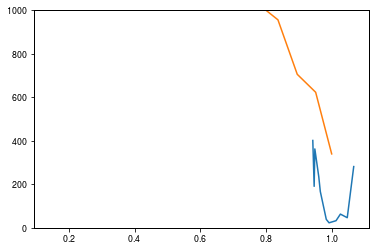

In [18]:
t = 2.4
eind = closest(vta.time_e, t)
cind = closest(vta.time_c, t)
plt.plot(vta.rho_e[eind,:]+0.005, vta.Te_e[eind,:])
plt.plot(vta.rho_c[cind,:]+0.005, vta.Te_c[cind,:])
plt.ylim(0,1e3)
plt.show()

In [ ]:
tsep = 100

for i in range(len(vta.time_e)):
    
    

#### Plots

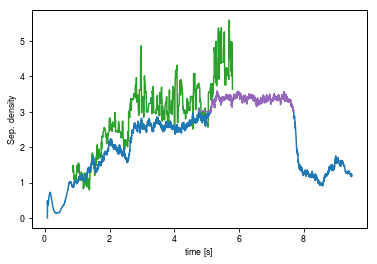

In [20]:
tlin = 5.8
msklin = lin_time<=tlin
plt.plot(lin_time[msklin], medfilt(nsep[msklin]*1e-19, 11), c='C2')
np.savetxt('./SupportFiles/lfssep_30733.LIN', np.c_[lin_time[msklin], medfilt(nsep[msklin]*1e-19, 11)])

mskref1 = (filtlfsnsep[:,1]*1.05<=3.0)&(filtlfsnsep[:,0]<6.0)
mskref3 = (filtlfsnsep[:,1]*1.05<=3.0)&(filtlfsnsep[:,0]>6.0)
mskref2 = (filtlfsnsep[:,1]*1.05>3.0)

plt.plot(filtlfsnsep[mskref1,0], filtlfsnsep[mskref1,1]*1.05, c='C0')
np.savetxt('./SupportFiles/lfssep_30733.1', np.c_[filtlfsnsep[mskref1,0], filtlfsnsep[mskref1,1]*1.05])
plt.plot(filtlfsnsep[mskref3,0], filtlfsnsep[mskref3,1]*1.05, c='C0')
np.savetxt('./SupportFiles/lfssep_30733.2', np.c_[filtlfsnsep[mskref3,0], filtlfsnsep[mskref3,1]*1.05])
plt.plot(filtlfsnsep[mskref2,0], filtlfsnsep[mskref2,1]*1.05, c='C4')
np.savetxt('./SupportFiles/lfssep_30733.3', np.c_[filtlfsnsep[mskref2,0], filtlfsnsep[mskref2,1]*1.05])
plt.plot()
plt.ylabel('Sep. density')
plt.xlabel('time [s]')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from getsig import getsig
from scipy.signal import medfilt
#
plt.style.use('helvet2')
#

In [21]:
shotnr = 30733
inner, outer, tme, newalf, filtlfsnsep, ht, hs, dt, ds, nbt, nbs, h98t, h98s = pickle.load(open('./SupportFiles/baratron_comparison.30733','rb'))
f11 = getsig(shotnr, 'IOC', 'F11')
f05 = getsig(shotnr, 'IOC', 'F05')
conv_factor = 1.5e23

/afs/ipp/aug/ads-diags/common/python/lib/dd_20180216.py:117: RuntimeWarning: Warning by DDcsgnl (8.1): no calibration of data
  warnings.warn(text.replace('\x00','').strip(), RuntimeWarning)


In [28]:
lfs_sep1 = np.loadtxt('./SupportFiles/lfssep_30733.1')
lfs_sep2 = np.loadtxt('./SupportFiles/lfssep_30733.2')
lfs_sep3 = np.loadtxt('./SupportFiles/lfssep_30733.3')
lin_sep = np.loadtxt('./SupportFiles/lfssep_30733.LIN')

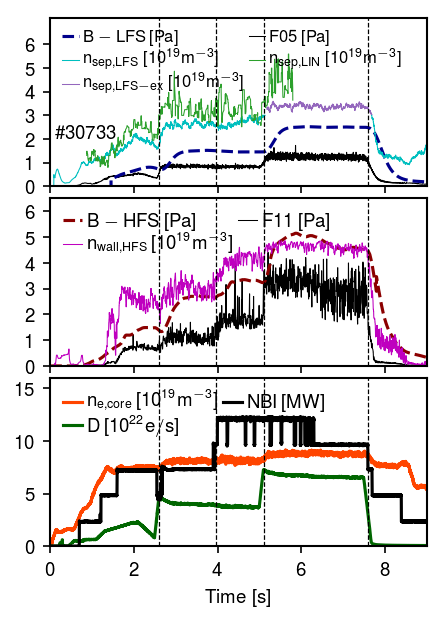

In [33]:
f, axarr = plt.subplots(3, sharex=True, figsize=(3,4),dpi=150)

ax = axarr[0]
fsize = 10

ax.plot(outer.time, outer.data*1e2, label=r"$\mathrm{B-LFS\,[Pa]}$", color='darkblue', ls='--')
#ax.plot(filtlfsnsep[:,0], filtlfsnsep[:,1], label=r"$\mathrm{n_{sep,LFS}\,[10^{19}m^{-3}]}$", color='c', lw=0.5)
ax.plot(lfs_sep1[:,0], lfs_sep1[:,1], label=r"$\mathrm{n_{sep,LFS}\,[10^{19}m^{-3}]}$", color='c', lw=0.5)
st_ind = 100
ax.plot(lfs_sep3[st_ind:,0], lfs_sep3[st_ind:,1], label=r"$\mathrm{n_{sep,LFS-ex}\,[10^{19}m^{-3}]}$", color='C4', lw=0.5)
ax.plot(lfs_sep2[:,0], lfs_sep2[:,1], color='c', lw=0.5)

ax.plot(f05.time, f05.data/conv_factor, label=r"$\mathrm{F05\,[Pa]}$", color='k', lw=0.5, zorder=1)

ax.plot(lin_sep[:,0], lin_sep[:,1], label='$\mathrm{n_{sep,LIN}\,[10^{19}m^{-3}]}$', c='C2', lw=0.5)

ax.text(0.1, 2.0, '\#30733')

#ax.plot(middle.time, middle.data, label=middle.description)
ax.set_xlim(0,9)
ax.set_ylim(0,7.1)
#ax.set_ylabel('Pressure ['+inner.unit+']')
ax.set_yticks([0,1,2,3,4,5,6])
ax.legend(frameon=False, loc='upper left',borderpad=0.2,ncol=2,fontsize=8,
          labelspacing=0.15, columnspacing=0.25, handlelength=1, handletextpad=0.3)

#Inner divertor data
ax = axarr[1]
ax.plot(inner.time, inner.data*1e2, label=r"$\mathrm{B-HFS\,[Pa]}$", color='darkred', ls='--')
ax.plot(tme, newalf, label=r"$\mathrm{n_{wall,HFS}\,[10^{19}m^{-3}]}$", color='m', lw=0.5)
ax.plot(f11.time, medfilt(f11.data,9)/conv_factor, label=r"$\mathrm{F11\,[Pa]}$", color='k', lw=0.5, zorder=1)
ax.legend(frameon=False, loc='upper left',borderpad=0.2,ncol=2,
          labelspacing=0.15, columnspacing=0.25, handlelength=1, handletextpad=0.3)

ax.set_yticks([0,1,2,3,4,5,6])
ax.set_ylim(0,6.5)

ax = axarr[2]

ax.plot(ht, hs*1e-19, label=r'$\mathrm{n_{e,core}\,[10^{19}m^{-3}]}$', color='orangered')
ax.plot(dt, ds*1e-22, label=r'$\mathrm{D\,[10^{22}e/s]}$', color='#006600')
ax.plot(nbt, nbs*1e-6, label=r'$\mathrm{NBI\,[MW]}$', color='k')
#ax.plot(h98t, h98s[:,7]*10, label=r'$\mathrm{H_{98,y2}\times10}$', color='b', lw=0.5)
#ax.plot(h5t, h5s, label='H-5')
ax.set_ylim(0,16)
#ax.set_yticks([0,2,4,6,8,10,12,14])
ax.legend(frameon=False, loc='upper left',borderpad=0.2,ncol=2,
          labelspacing=0.15, columnspacing=0.25, handlelength=1, handletextpad=0.3)

#ax.axhline(10, color='b', ls='--', lw=0.6)
#ax.text(6.7, 10.1, r'$\mathrm{H_{98,y2}=1}$', va='bottom', color='b')

##Add vertical bars
for ax in axarr:
    ax.axvline(x=2.6, color='k', ls='--',lw=0.6)
    ax.axvline(x=3.95, color='k', ls='--',lw=0.6)
    ax.axvline(x=5.1, color='k', ls='--',lw=0.6)
    ax.axvline(x=7.6, color='k', ls='--',lw=0.6)

#for ax in axarr:
#    for tme in timesfit:
#        ax.axvline(x=tme, color='k', ls='--', lw=0.6)

ax.set_xlabel('Time [s]')
plt.tight_layout()
plt.subplots_adjust(left=None, bottom=0.1, right=0.96, top=0.98, wspace=0.04, hspace=0.07)
#plt.savefig('barall_' + str(shotnr) + 'nolines.png', dpi=300)
#plt.savefig('barall_' + str(shotnr) + '.png', dpi=300)
plt.savefig('./Revised/Figure7.png', dpi=300)
plt.show()